# **1.Log loss or Binary cross entropy (Binary class classification)**

In [291]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [292]:
Data=pd.DataFrame({
    'x':[1,2,3,4],
    'y':[0,0,1,1]
})
Data

,x,y
0,1,0
1,2,0
2,3,1
3,4,1


In [293]:
w=0.5
b=0.0
Learning_rate=0.1

In [294]:
sample_1=b+w*Data['x'][0]
sample_2=b+w*Data['x'][1]
sample_3=b+w*Data['x'][2]
sample_4=b+w*Data['x'][3]

# **Converting linear output to probabilities using sigmoid function:**

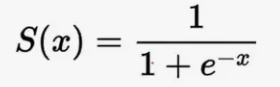

In [295]:
using_sigmoid_for_sample_1=1/(1+np.exp(-sample_1))
using_sigmoid_for_sample_2=1/(1+np.exp(-sample_2))
using_sigmoid_for_sample_3=1/(1+np.exp(-sample_3))
using_sigmoid_for_sample_4=1/(1+np.exp(-sample_4))

In [296]:
Data['Predicted probabilities']=[using_sigmoid_for_sample_1,using_sigmoid_for_sample_2,using_sigmoid_for_sample_3,using_sigmoid_for_sample_4]

In [297]:
Data

,x,y,Predicted probabilities
0,1,0,0.622459
1,2,0,0.731059
2,3,1,0.817574
3,4,1,0.880797


#NOTE : For sample 1 , model gave probability 0.622459 for class 0 , so it overestimates. We want to decrease its score to zero

# **Calculating cost using log loss:**

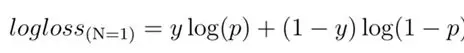

# Whenever you computing log loss , for class 0 use (-log(1-y_pred)), for class 1 use (-log(y_pred))

In [298]:
sample_1_loss=-np.log(1-using_sigmoid_for_sample_1)
sample_2_loss=-np.log(1-using_sigmoid_for_sample_2)
sample_3_loss=-np.log(using_sigmoid_for_sample_3)
sample_4_loss=-np.log(using_sigmoid_for_sample_4)

In [299]:
Data['loss']=[sample_1_loss,sample_2_loss,sample_3_loss,sample_4_loss]

In [300]:
Data

,x,y,Predicted probabilities,loss
0,1,0,0.622459,0.974077
1,2,0,0.731059,1.313262
2,3,1,0.817574,0.201413
3,4,1,0.880797,0.126928


In [301]:
total_log_loss=(sample_1_loss+sample_2_loss+sample_3_loss+sample_4_loss)/4
total_log_loss

np.float64(0.6539199901810137)

# **Computing gradients w.r.t weight**

In [302]:
s1_weigth_gradient=1*(using_sigmoid_for_sample_1-0)
s2_weigth_gradient=2*(using_sigmoid_for_sample_2-0)
s3_weigth_gradient=3*(using_sigmoid_for_sample_3-1)
s4_weigth_gradient=4*(using_sigmoid_for_sample_4-1)

In [303]:
gradient_weight=1/4*(s1_weigth_gradient+s2_weigth_gradient+s3_weigth_gradient+s4_weigth_gradient)
print('New weight: ',gradient_weight)
gradient_bias=1/4*(s1_weigth_gradient+s2_weigth_gradient+s3_weigth_gradient+s4_weigth_gradient)
print('New bias: ',gradient_bias)

New weight:  0.2651220572385812
New bias:  0.2651220572385812


In [304]:
new_w=w-Learning_rate*gradient_weight
new_b=b-Learning_rate*gradient_bias
print(f'New weight: {new_w} \nNew bias: {new_b}')

New weight: 0.4734877942761419 
New bias: -0.02651220572385812


# **Continously update until we get a decreased log loss**



---



# **2.Cross Entropy (Multiclass classfication)**

In [305]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [306]:
Data=pd.DataFrame({
    'x1':[2,1,0,3],
    'x2':[1,3,2,0],
    'x3':[0,1,4,2],
    'y':[0,1,2,0]
})

In [307]:
Data

,x1,x2,x3,y
0,2,1,0,0
1,1,3,1,1
2,0,2,4,2
3,3,0,2,0


In [308]:
w=np.matrix([[0.2,0.1,-0.1],[-0.3,0.4,0.2],[0.1,-0.2,0.3]])
b=np.array([0.0,0.0,0.0])

In [309]:
w,b

(matrix([[ 0.2,  0.1, -0.1],
         [-0.3,  0.4,  0.2],
         [ 0.1, -0.2,  0.3]]),
 array([0., 0., 0.]))

# **For sample one**

In [310]:
sample1 = np.array([2, 1, 0])
sample1_y_true = 0
sample_1_linear_output=np.dot(w,sample1)

In [311]:
sample_1_linear_output

matrix([[ 0.5, -0.2,  0. ]])

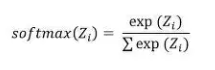

In [312]:
z1=np.exp(0.5)
z2=np.exp(-0.2)
z3=np.exp(0.0)

In [313]:
Zi=z1+z2+z3

In [314]:
y_pred_prob_for_class1=z1/Zi
y_pred_prob_for_class2=z2/Zi
y_pred_prob_for_class3=z3/Zi

In [315]:
sample_1_predicteded_prob=np.array([y_pred_prob_for_class1,y_pred_prob_for_class2,y_pred_prob_for_class3])
sample_1_predicteded_prob

array([0.47548496, 0.23611884, 0.2883962 ])

In [316]:
print('For class 0 :',sample_1_predicteded_prob[0])
print('For class 1 :',sample_1_predicteded_prob[1])
print('For class 2 :',sample_1_predicteded_prob[2])

For class 0 : 0.47548495534876756
For class 1 : 0.2361188410001125
For class 2 : 0.28839620365112


In [317]:
cross_entropy_loss_for_sample1=-np.log(sample_1_predicteded_prob[0])
print('Cross entropy loss for sample 1 :',cross_entropy_loss_for_sample1)

Cross entropy loss for sample 1 : 0.7434200371423096


# **For sample two**

In [318]:
sample2=np.array([1,3,1])
sample2_y_true=1

In [319]:
sample2_linear_output=np.dot(sample2,w)
sample2_linear_output

matrix([[-0.6,  1.1,  0.8]])

In [320]:
z1=np.exp(-0.6)
z2=np.exp(1.1)
z3=np.exp(0.8)

In [321]:
Zi=z1+z2+z3

In [322]:
y_pred_prob_for_class1=z1/Zi
y_pred_prob_for_class2=z2/Zi
y_pred_prob_for_class3=z3/Zi

In [323]:
sample_2_predicteded_prob=np.array([y_pred_prob_for_class1,y_pred_prob_for_class2,y_pred_prob_for_class3])
sample_2_predicteded_prob

array([0.09497445, 0.51988515, 0.38514039])

In [324]:
print('For class 0 :',sample_2_predicteded_prob[0])
print('For class 1 :',sample_2_predicteded_prob[1])
print('For class 2 :',sample_2_predicteded_prob[2])

For class 0 : 0.09497445196128733
For class 1 : 0.5198851535942092
For class 2 : 0.3851403944445036


In [325]:
cross_entropy_loss_for_sample2=-np.log(sample_2_predicteded_prob[1])
print('Cross entropy loss for sample 2 :',cross_entropy_loss_for_sample1)

Cross entropy loss for sample 2 : 0.7434200371423096


# **For sample three**

In [326]:
sample3=np.array([0,2,4])
sample3_y_true=2

In [327]:
sample3_linear_output=np.dot(sample3,w)
sample3_linear_output

matrix([[-0.2,  0. ,  1.6]])

In [328]:
z1=np.exp(-0.2)
z2=np.exp(0.0)
z3=np.exp(1.6)

In [329]:
Zi=z1+z2+z3

In [330]:
y_pred_prob_for_class1=z1/Zi
y_pred_prob_for_class2=z2/Zi
y_pred_prob_for_class3=z3/Zi

In [331]:
sample_3_predicteded_prob=np.array([y_pred_prob_for_class1,y_pred_prob_for_class2,y_pred_prob_for_class3])
sample_3_predicteded_prob

array([0.12090363, 0.14767203, 0.73142434])

In [332]:
print('For class 0 :',sample_3_predicteded_prob[0])
print('For class 1 :',sample_3_predicteded_prob[1])
print('For class 2 :',sample_3_predicteded_prob[2])

For class 0 : 0.12090363050520819
For class 1 : 0.14767202777063934
For class 2 : 0.7314243417241525


In [333]:
cross_entropy_loss_for_sample3=-np.log(sample_3_predicteded_prob[2])
print('Cross entropy loss for sample 3 :',cross_entropy_loss_for_sample3)

Cross entropy loss for sample 3 : 0.3127614928196276


# **For sample four**

In [334]:
sample4=np.array([3,0,2])
sample4_y_true=0

In [335]:
sample4_linear_output=np.dot(sample4,w)
sample4_linear_output

matrix([[ 0.8, -0.1,  0.3]])

In [336]:
z1=np.exp(0.8)
z2=np.exp(-0.1)
z3=np.exp(0.3)

In [337]:
Zi=z1+z2+z3

In [338]:
y_pred_prob_for_class1=z1/Zi
y_pred_prob_for_class2=z2/Zi
y_pred_prob_for_class3=z3/Zi

In [339]:
sample_4_predicteded_prob=np.array([y_pred_prob_for_class1,y_pred_prob_for_class2,y_pred_prob_for_class3])
sample_4_predicteded_prob

array([0.49674623, 0.20196195, 0.30129182])

In [340]:
print('For class 0 :',sample_4_predicteded_prob[0])
print('For class 1 :',sample_4_predicteded_prob[1])
print('For class 2 :',sample_4_predicteded_prob[2])

For class 0 : 0.49674623283135966
For class 1 : 0.20196194685967028
For class 2 : 0.30129182030896995


In [341]:
cross_entropy_loss_for_sample4=-np.log(sample_4_predicteded_prob[0])
print('Cross entropy loss for sample 3 :',cross_entropy_loss_for_sample4)

Cross entropy loss for sample 3 : 0.6996759812098481


In [342]:
Overall_loss=(cross_entropy_loss_for_sample1+cross_entropy_loss_for_sample2+cross_entropy_loss_for_sample3+cross_entropy_loss_for_sample4)/4
print('Overall loss :',Overall_loss)

Overall loss : 0.602501215360987


In [343]:
Overall_loss

np.float64(0.602501215360987)